# LOGISTIC TESTpress with Chat GPT

In [15]:
# Import the necessary modules
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import numpy as np
import os


In [16]:
# Scelta automatica del Path locale tra "paoloartasensi" o "lorenzobassetti"
path = '/Users/paoloartasensi/Python_Scripts/artabax/'
isdir = os.path.isdir(path)
if isdir == True:
    path = '/Users/paoloartasensi/Python_Scripts/artabax/'
else:
    path = '/Users/lorenzobassetti/Dropbox/Quant/Python_DEV/artabax/'

## FILE NAME

In [17]:
############## COPY AND PAST RELATIVE PATH HERE" ###############

relative_file_name = 'Gdrive_csv/20221228_1033AM_squat.csv'

################################################################

# Load the dataset into a pandas DataFrame
df = pd.read_csv(path+relative_file_name)
# Extract the substring [relative_name_file] from the string
string = relative_file_name
start_index = string.find('Gdrive_csv/') + len('Gdrive_csv/')
end_index = string.find('.csv')
substring = string[start_index:end_index]

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 798 entries, 0 to 797
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   timestamp  798 non-null    int64  
 1   ax         798 non-null    float64
 2   ay         798 non-null    float64
 3   az         798 non-null    float64
 4   gx         798 non-null    float64
 5   gy         798 non-null    float64
 6   gz         798 non-null    float64
 7   pitch      798 non-null    float64
 8   roll       798 non-null    float64
 9   BAR        798 non-null    float64
 10  totacc     798 non-null    float64
 11  status     798 non-null    int64  
 12  mov        0 non-null      float64
 13  prob       798 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 87.4 KB


In [19]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Select the columns containing the features
X = df[['ax', 'ay', 'az', 'gx', 'gy', 'gz','pitch','roll', 'BAR','totacc' ]]

# Select the column containing the labels (0 for non-rep, 1 for rep)
y = df['status']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=None)

# Train a random forest classifier on the training data
model = RandomForestClassifier(n_estimators=100)
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: {:.2f}%'.format(accuracy*100))


from sklearn.metrics import accuracy_score, precision_score, recall_score
#Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)

Accuracy: 85.62%
Accuracy: 0.85625
Precision: 0.6
Recall: 0.6206896551724138


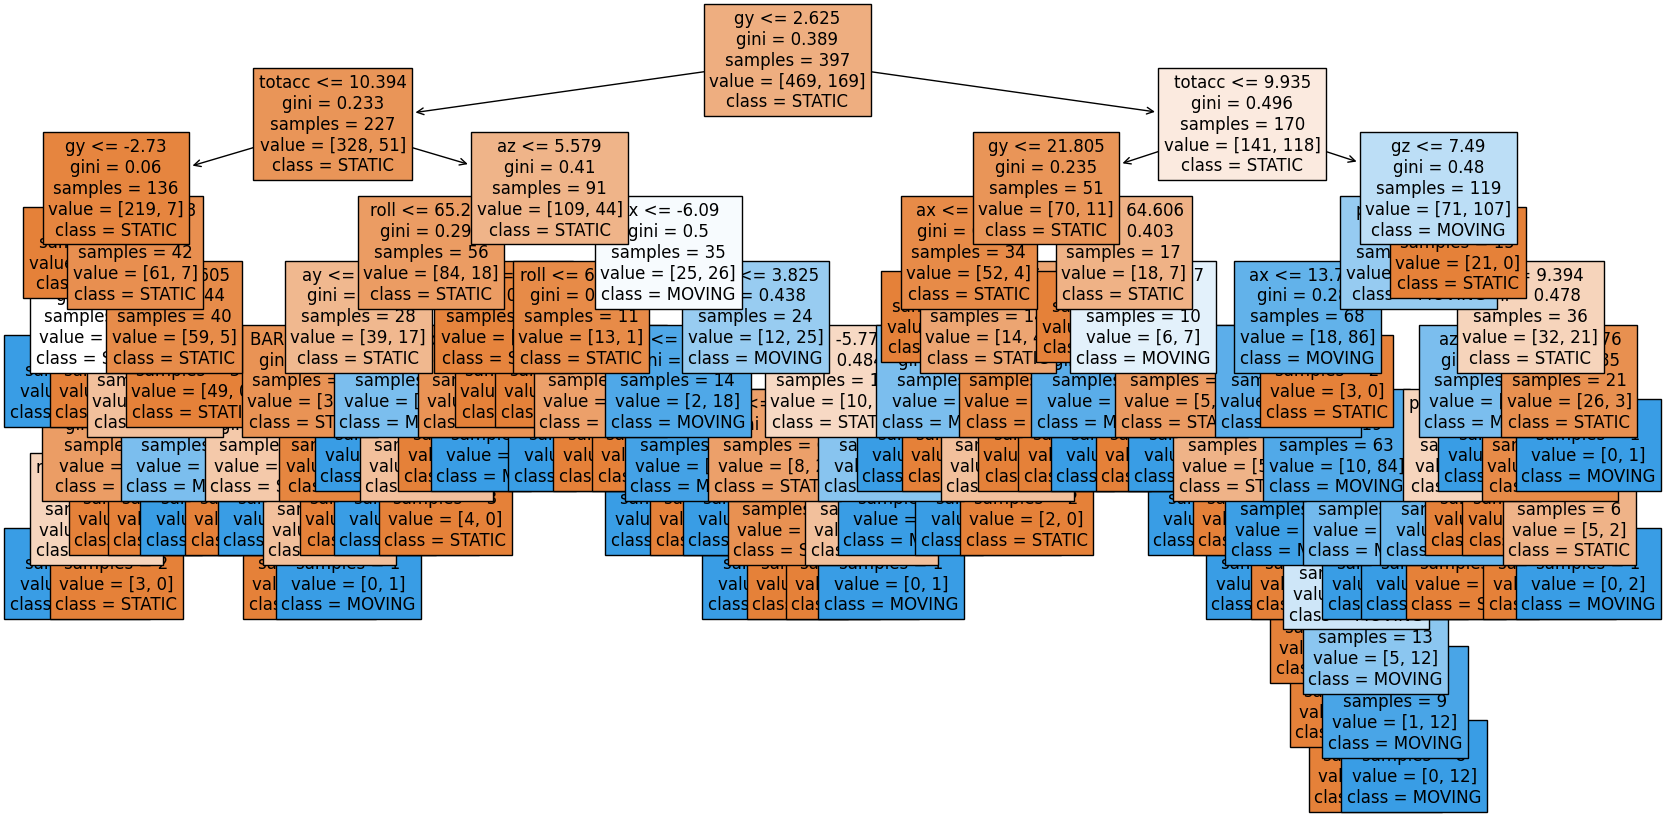

In [20]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Get the first decision tree in the random forest
tree = model.estimators_[0]
# Plot the decision tree
plt.figure(figsize=(20, 10))
plot_tree(tree, feature_names=X.columns, class_names=['STATIC', 'MOVING'], filled=True, fontsize=12)
plt.show()

# Logistic Regression ML

In [21]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=None)

# Train a logistic regression model on the training data
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: {:.2f}%'.format(accuracy*100))

#Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)


Accuracy: 69.38%
Accuracy: 0.69375
Precision: 0.55
Recall: 0.21568627450980393


## Logistic Regression "Weights" (coefficients)

In [22]:
# Print the weights (coefficients) for each feature with their corresponding labels (feature names)
for feature, coef in zip(X.columns, model.coef_[0]):
    print('{}: {}'.format(feature, coef))
print("b0",model.intercept_)

ax: 1.4145050195282676
ay: 0.7268086643664927
az: 1.72236967453692
gx: -0.011476057341121886
gy: 0.03450396239542599
gz: -0.09746545958614106
pitch: -0.03801023622479788
roll: 0.02888313474595713
BAR: -0.1522646211475112
totacc: -1.7367880506267852
b0 [-5.42061105]


## Coefficients in order

In [23]:
from sklearn.metrics import r2_score, explained_variance_score, confusion_matrix, accuracy_score, classification_report, log_loss, precision_score, recall_score
import seaborn as sns


log_reg = LogisticRegression(random_state=None, solver = 'lbfgs', max_iter=1000)
log_reg.fit(X_train, y_train)

# predict - Predict class labels for samples in X
y_pred = log_reg.predict(X_train)

# coef_ - Coefficient of the features in the decision function
log_reg.coef_

intercept = str(model.intercept_)[1:-1]

lr = pd.DataFrame(data =[X_train.columns, np.array(log_reg.coef_[0]).tolist()]).T
lr.rename(columns={0:'Reg',1:'Logistic'}, inplace=True)
lr.set_index('Reg', inplace=True)
lr.sort_values(by='Logistic', key=abs, ascending=False , inplace=True)
print(lr)
print('b0:',log_reg.intercept_[0])


        Logistic
Reg             
totacc -1.736788
az       1.72237
ax      1.414505
ay      0.726809
BAR    -0.152265
gz     -0.097465
pitch   -0.03801
gy      0.034504
roll    0.028883
gx     -0.011476
b0: -5.420611051038396


## COLORED CONFUSION MATRIX

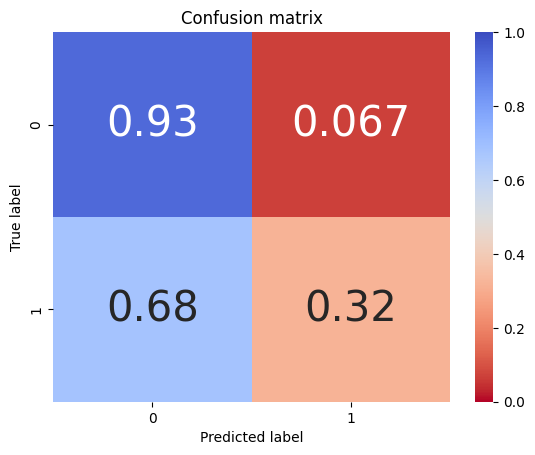

In [24]:
def plot_confusion_matrix(cm, classes=None, title='Confusion matrix'):
    """Plots a confusion matrix."""
    if classes is not None:
        sns.heatmap(cm, cmap="coolwarm_r", 
                    xticklabels=classes, 
                    yticklabels=classes, 
                    vmin=0., vmax=1., 
                    annot=True, annot_kws={'size':30}
                    )
    else:
        sns.heatmap(cm, vmin=0., vmax=1.)
    plt.title(title)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Visualizing cm

cm = confusion_matrix(y_train, y_pred)
cm_norm = cm / cm.sum(axis=1).reshape(-1,1)

plot_confusion_matrix(cm_norm, classes = log_reg.classes_, title='Confusion matrix')

## TEST FALSE/TRUE positive FALSE/TRUE negative

In [25]:
# Calculating False Positives (FP), False Negatives (FN), True Positives (TP) & True Negatives (TN)
FP = cm.sum(axis=0) - np.diag(cm)
FN = cm.sum(axis=1) - np.diag(cm)
TP = np.diag(cm)
TN = cm.sum() - (FP + FN + TP)

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP / (TP + FN)
print("The True Positive Rate is:", TPR)

# Precision or positive predictive value
PPV = TP / (TP + FP)
print("The Precision is:", PPV)

# False positive rate or False alarm rate
FPR = FP / (FP + TN)
print("The False positive rate is:", FPR)


# False negative rate or Miss Rate
FNR = FN / (FN + TP)
print("The False Negative Rate is: ", FNR)

The True Positive Rate is: [0.93265306 0.31756757]
The Precision is: [0.81899642 0.5875    ]
The False positive rate is: [0.68243243 0.06734694]
The False Negative Rate is:  [0.06734694 0.68243243]


## Logistic Regression EVALUATION


LogReg Training Accuracy is:  0.7899686520376176
LogReg Testing Accuracy is:  0.69375


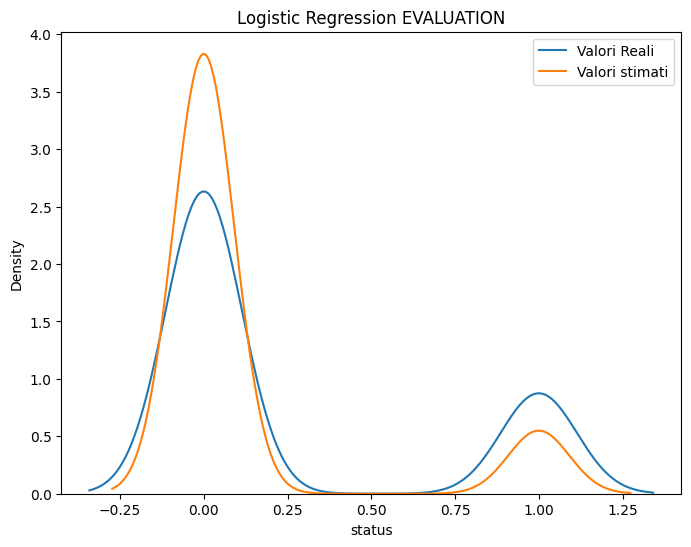

In [26]:
'''Logistic Regression EVALUATION'''

# Accuracy on Train
print("LogReg Training Accuracy is: ", log_reg.score(X_train, y_train))
# Accuracy on Test
print("LogReg Testing Accuracy is: ", log_reg.score(X_test, y_test))
# Classification Report

plt.figure(figsize=(8, 6))
plt.title('Logistic Regression EVALUATION')
sns.kdeplot(data=df, x='status' , label='Valori Reali')
sns.kdeplot(y_pred , label='Valori stimati')
plt.legend()
plt.show()

## Back Up coefficient by Exercise Type
Back Up coefficient data in specific exercise type name

In [27]:
import csv

# Create a list of tuples to hold the feature names and coefficients
coefficients = []
for feature, coef in zip(X.columns, model.coef_[0]):
    coefficients.append((feature, coef))

# Append the intercept to the list of coefficients
coefficients.append(('intercept', intercept))

# Specify the full path to the directory where you want to save the file
directory = '/Users/paoloartasensi/Python_Scripts/artabax/Gdrive_csv/'

# Open a file for writing in 'w' mode (overwrites the file if it already exists)
with open(directory + 'coefficients'+ substring + '.csv', 'w', newline='') as csvfile:
    # Create a CSV writer object
    writer = csv.writer(csvfile)

    # Write the header row
    writer.writerow(['feature', 'coefficient'])

    # Write the rows for the coefficients
    for feature, coef in coefficients:
        writer.writerow([feature, coef])


## Overwrite the Google Drive sync "coefficients.csv"
Automatic updates the file to be read from the App once opened on the watch or updated.

In [28]:
# Open a file for writing in 'w' mode (overwrites the file if it already exists)
with open(directory + 'coefficients.csv', 'w', newline='') as csvfile:
    # Create a CSV writer object
    writer = csv.writer(csvfile)

    # Write the header row
    writer.writerow(['feature', 'coefficient'])

    # Write the rows for the coefficients
    for feature, coef in coefficients:
        writer.writerow([feature, coef])